In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

url = "https://storage.googleapis.com/courses_data/Python%20Data/superleague2022-2023/Panaitolikos%20-%20AEK.csv"
df = pd.read_csv(url)

In [23]:
 # Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 161 entries, teamName to yellowCard
dtypes: int64(158), object(3)
memory usage: 50.4+ KB


In [24]:
# Get some descriptive statistics of the dataframe
df.describe()

,accurateBackZonePass,accurateChippedPass,accurateCornersIntobox,accurateCross,accurateCrossNocorner,accurateFlickOn,accurateFwdZonePass,accurateGoalKicks,accurateKeeperThrows,accurateLaunches,...,touches,touchesInOppBox,turnover,unsuccessfulTouch,wasFouled,winningGoal,wonContest,wonCorners,wonTackle,yellowCard
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.00000
mean,6.375000,1.200000,0.100000,0.200000,0.100000,0.050000,8.8500,0.400000,0.075000,0.175000,...,25.825000,0.925000,0.475000,0.475000,0.775000,0.025000,0.100000,0.175000,0.52500,0.15000
std,7.675093,1.963774,0.378932,0.516398,0.303822,0.220721,11.0814,1.822931,0.349908,0.712075,...,22.482914,1.525636,0.784056,0.784056,1.143263,0.158114,0.378932,0.549475,0.84694,0.36162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,...,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.5000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.0000,0.000000,0.000000,0.000000,...,37.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,28.000000,11.000000,2.000000,2.000000,1.000000,1.000000,49.0000,10.000000,2.000000,4.000000,...,91.000000,8.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.00000,1.00000


In [25]:
df.head()

,teamName,matchName,position,accurateBackZonePass,accurateChippedPass,accurateCornersIntobox,accurateCross,accurateCrossNocorner,accurateFlickOn,accurateFwdZonePass,...,touches,touchesInOppBox,turnover,unsuccessfulTouch,wasFouled,winningGoal,wonContest,wonCorners,wonTackle,yellowCard
0,Panaitolikos,G. Anestis,Goalkeeper,8,2,0,0,0,0,10,...,41,0,0,0,0,0,0,0,0,0
1,Panaitolikos,I. Chatzitheodoridis,Defender,7,1,0,0,0,0,7,...,38,0,0,0,3,0,0,0,1,1
2,Panaitolikos,D. Cornelius,Defender,10,3,0,0,0,0,11,...,33,0,0,0,1,0,0,0,1,0
3,Panaitolikos,J. Une-Larsson,Defender,18,3,0,0,0,0,4,...,38,0,0,0,0,0,0,0,1,0
4,Panaitolikos,K. Apostolakis,Defender,10,3,0,1,1,0,12,...,49,0,0,0,4,0,0,0,0,1


In [26]:
# Check for missing values
df.isnull().sum()

teamName                0
matchName               0
position                0
accurateBackZonePass    0
accurateChippedPass     0
                       ..
winningGoal             0
wonContest              0
wonCorners              0
wonTackle               0
yellowCard              0
Length: 161, dtype: int64

In [27]:
# Check for duplicate rows
df.duplicated().sum()

0

In [28]:
##Pass Success Rate (PSR):
def pass_success_rate(row):
    if row['totalPass']!=0:
        psr=(row['accuratePass']/row['totalPass'] *100)
    else:
            psr=0
    return psr
df['passSuccessRate']=df.apply(pass_success_rate,axis=1)

In [29]:
##Expected Goals (xG):
def xG(row):
    return (row['totalScoringAtt'] + 2*row['attIboxGoal']-0.5*row['attOboxMiss'] + row['attOpenplay'])/4
df['xG']=df.apply(xG,axis=1)

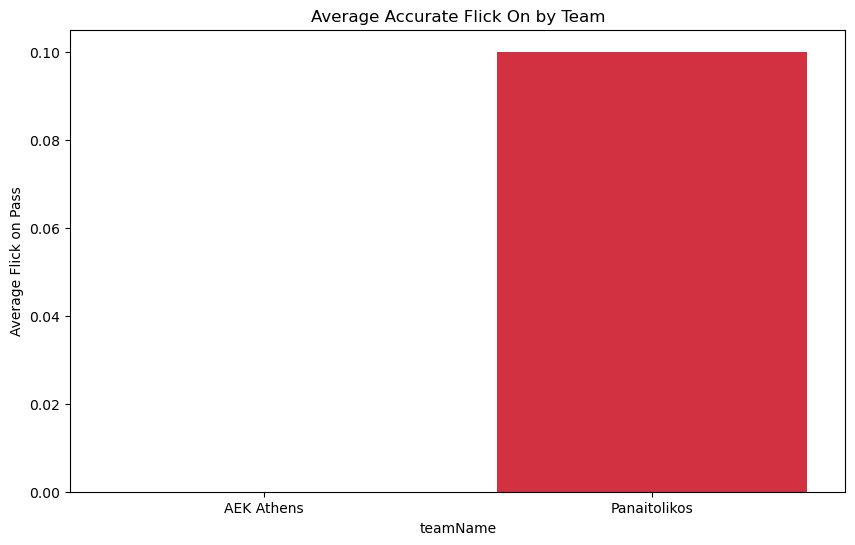

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_flick_on_pass=df.groupby('teamName')['accurateFlickOn'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_flick_on_pass.index,y=avg_flick_on_pass.values,palette=['#034694','#EB172B'])
plt.title('Average Accurate Flick On by Team')
plt.ylabel('Average Flick on Pass')
plt.show()

In [31]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Pie(labels=avg_flick_on_pass.index,values=avg_flick_on_pass.values,marker_colors=['#034694','#EB172B'])])
fig.update_layout(title_text='Average Accurate Flick On by Team')
fig.show()

In [32]:
top_shooter=df[df['ontargetScoringAtt']==df['ontargetScoringAtt'].max()]['matchName']
print(f"The player with the most on-target scoring attempts is {top_shooter}.")              

The player with the most on-target scoring attempts is 27    M. Gaćinović
29       S. Araújo
30       L. García
38     H. Moukoudi
Name: matchName, dtype: object.


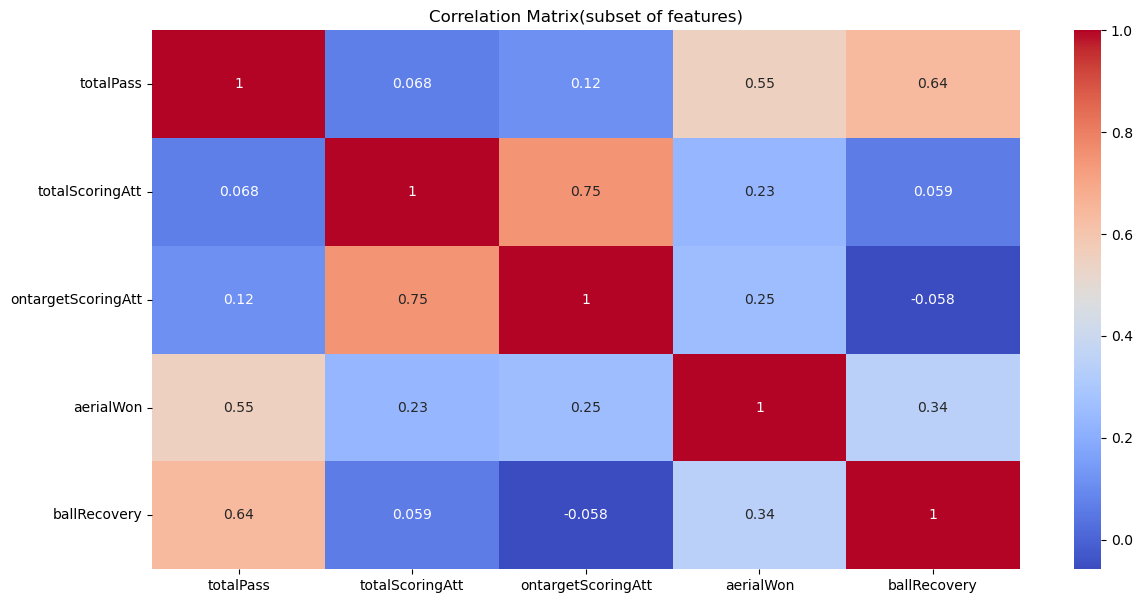

In [33]:
features=['totalPass','totalScoringAtt','ontargetScoringAtt','aerialWon','ballRecovery']
correlation_subset=df[features].corr()
plt.figure(figsize=(14,7))
sns.heatmap(correlation_subset,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix(subset of features)')
plt.show()

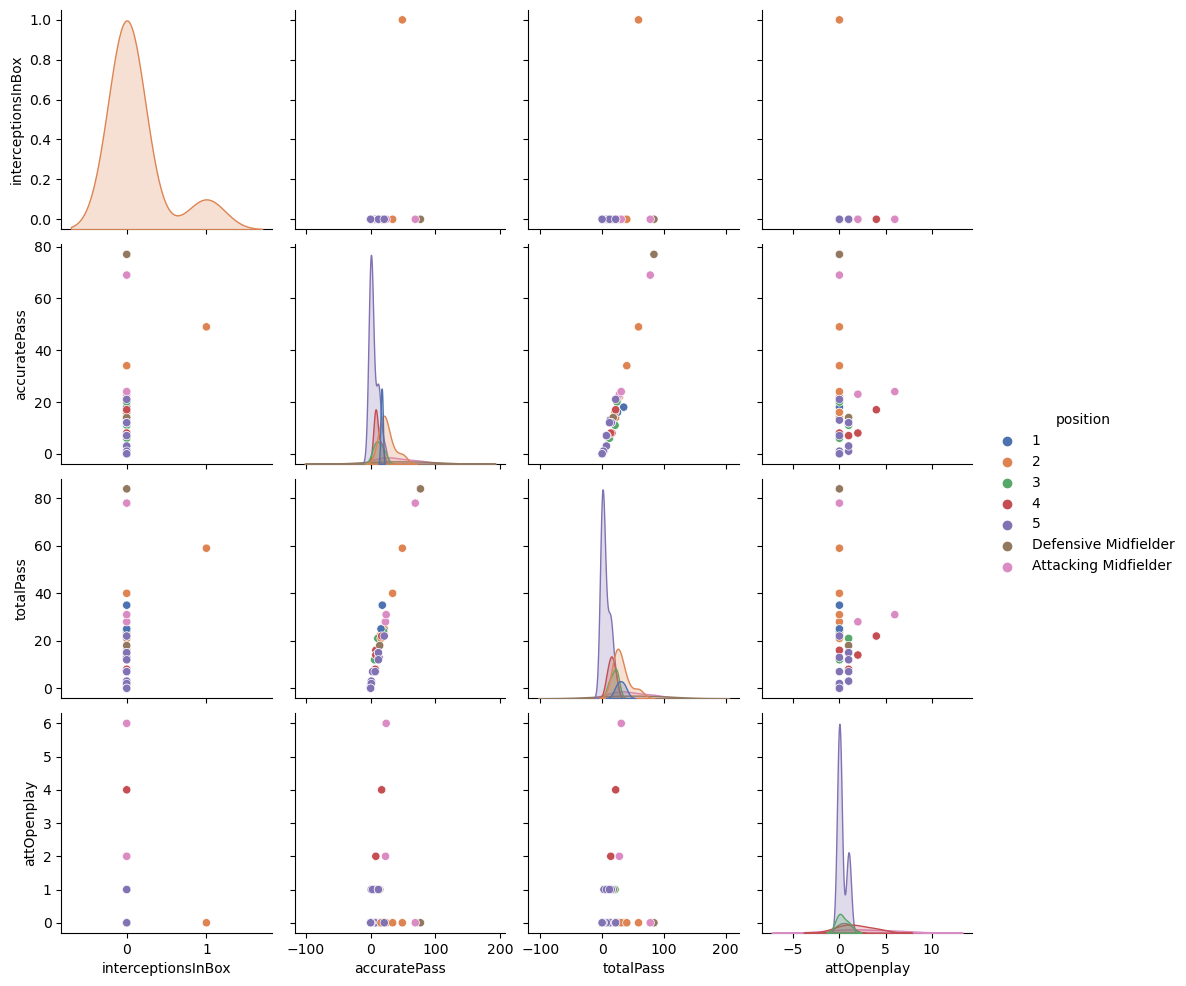

In [34]:
import seaborn as sns
# Select only relevant columns for the pairplot
df_pairplot=df[['position','interceptionsInBox','accuratePass','totalPass','attOpenplay']].copy()
# Replace each position with an integer, as pairplot needs numerical data to function
position_replace={'Goalkeeper':1,'Defender': 2, 'Midfielder': 3, 'Striker': 4, 'Substitute': 5}
df_pairplot.loc[:,'position']=df_pairplot['position'].replace(position_replace)
# Draw the pairplot
sns.pairplot(df_pairplot,hue='position',palette='deep')
plt.show()

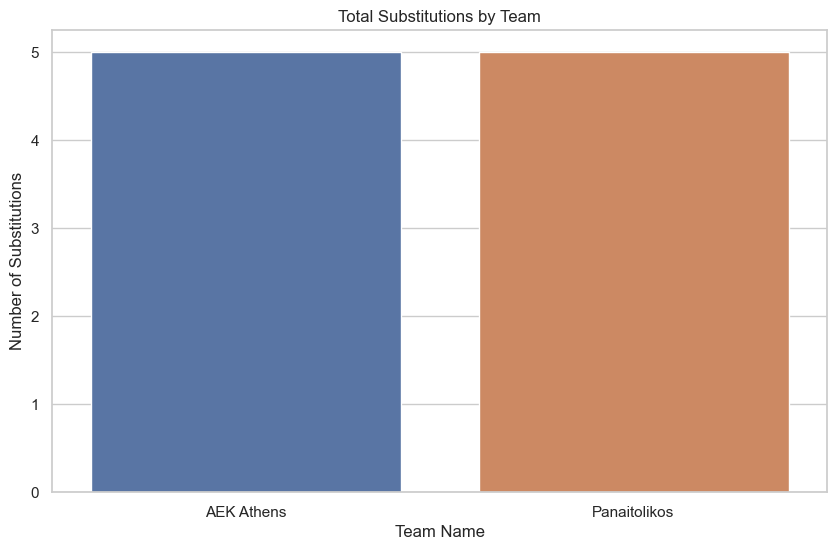

In [35]:
import seaborn as sns

# Group data by teamName and get the sum of totalSubOn for each team
team_sub = df.groupby('teamName')['totalSubOn'].sum().reset_index()

# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="teamName", y="totalSubOn", data=team_sub, palette="deep")
plt.title('Total Substitutions by Team')
plt.ylabel('Number of Substitutions')
plt.xlabel('Team Name')
plt.show()

In [36]:
import plotly.express as px
# Create a pie chart
fig = px.pie(team_sub, values='totalSubOn', names='teamName', color='teamName', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Total Substitutions by Team',title_x=0.5)
fig.show()

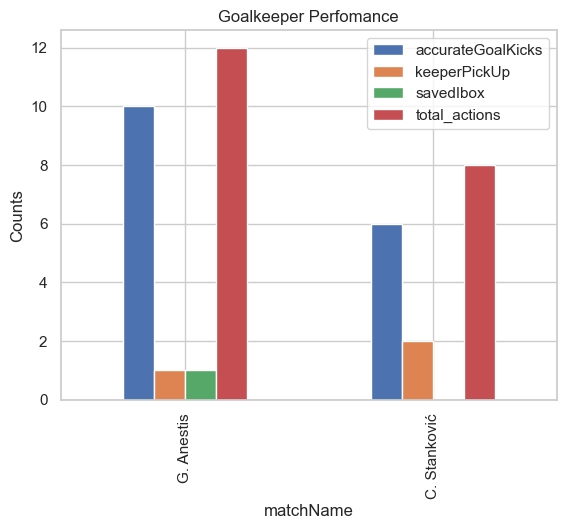

In [37]:
goalkeeper_stats = ['matchName', 'accurateGoalKicks', 'keeperPickUp', 'savedIbox']
df_gk = df[df['position']=='Goalkeeper'][goalkeeper_stats]
# calculate the total actions of each goalkeeper
df_gk['total_actions']=df_gk['accurateGoalKicks']+df_gk['keeperPickUp']+df_gk['savedIbox']
df_gk.plot(x='matchName', y=['accurateGoalKicks', 'keeperPickUp', 'savedIbox', 'total_actions'], kind='bar')
plt.title('Goalkeeper Perfomance')
plt.ylabel('Counts')
plt.show()

In [41]:
import plotly.express as px

fig = px.scatter(position_recovery_df, x='ballRecovery', y='position', color='position',
                 title='Average Ball Recoveries by Position', 
                 labels={'ballRecovery':'Average Ball Recoveries'})

fig.show()

C:\Users\ggmik\AppData\Local\Temp\ipykernel_20004\1758533498.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(


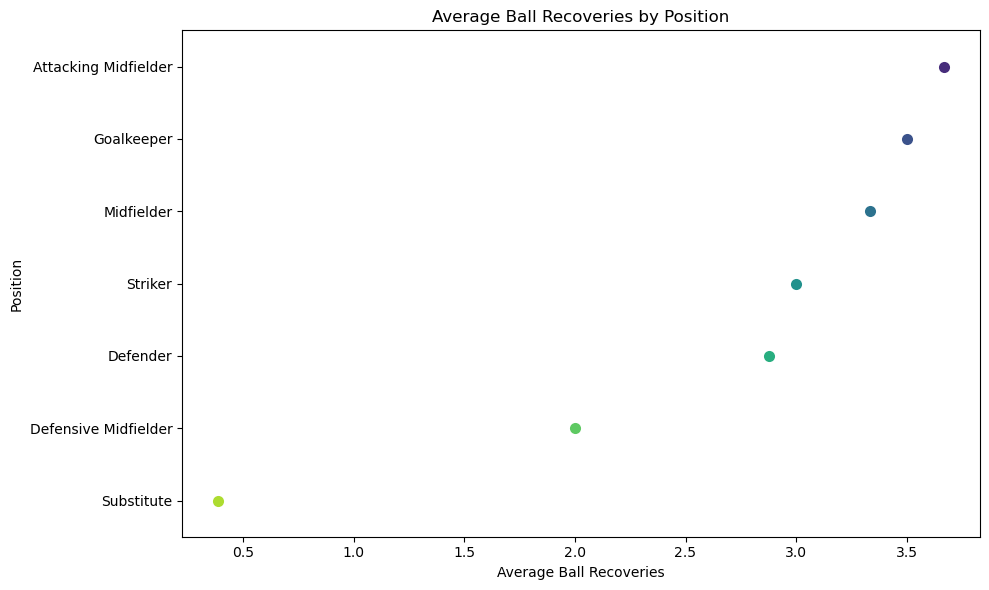

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the dataframe
position_recovery_df = df.groupby('position', as_index=False)['ballRecovery'].mean().sort_values('ballRecovery', ascending=False)

# Seaborn swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(
    x='ballRecovery',
    y='position',
    data=position_recovery_df,
    size=8,
    palette="viridis",  # Προαιρετικό για χρώμα
    order=position_recovery_df['position']  # για διατήρηση της σειράς
)
plt.title('Average Ball Recoveries by Position')
plt.xlabel('Average Ball Recoveries')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

In [14]:
df

,teamName,matchName,position,accurateBackZonePass,accurateChippedPass,accurateCornersIntobox,accurateCross,accurateCrossNocorner,accurateFlickOn,accurateFwdZonePass,...,touches,touchesInOppBox,turnover,unsuccessfulTouch,wasFouled,winningGoal,wonContest,wonCorners,wonTackle,yellowCard
0,Panaitolikos,G. Anestis,Goalkeeper,8,2,0,0,0,0,10,...,41,0,0,0,0,0,0,0,0,0
1,Panaitolikos,I. Chatzitheodoridis,Defender,7,1,0,0,0,0,7,...,38,0,0,0,3,0,0,0,1,1
2,Panaitolikos,D. Cornelius,Defender,10,3,0,0,0,0,11,...,33,0,0,0,1,0,0,0,1,0
3,Panaitolikos,J. Une-Larsson,Defender,18,3,0,0,0,0,4,...,38,0,0,0,0,0,0,0,1,0
4,Panaitolikos,K. Apostolakis,Defender,10,3,0,1,1,0,12,...,49,0,0,0,4,0,0,0,0,1
5,Panaitolikos,J. Díaz,Midfielder,10,3,0,0,0,0,10,...,32,2,1,1,4,0,0,0,0,0
6,Panaitolikos,S. Mladen,Midfielder,7,1,0,0,0,1,4,...,30,0,1,1,0,0,0,0,1,0
7,Panaitolikos,Frederico Duarte,Midfielder,3,2,0,0,0,1,3,...,26,0,3,3,2,0,0,0,3,0
8,Panaitolikos,N. Dago,Striker,4,0,0,0,0,0,4,...,29,2,1,1,1,0,0,0,2,0
9,Panaitolikos,N. Karelis,Striker,4,0,0,0,0,0,4,...,27,3,2,2,1,0,0,0,0,0


In [47]:
import plotly.express as px

fig = px.scatter(df, x='xG', y='passSuccessRate', hover_data=['matchName'], color='teamName')
fig.update_layout(title='Expected Goals (xG) vs Pass Success Rate', 
                  xaxis_title='Expected Goals (xG)', 
                  yaxis_title='Pass Success Rate (%)', 
                  autosize=False, width=800, height=500)
fig.show()

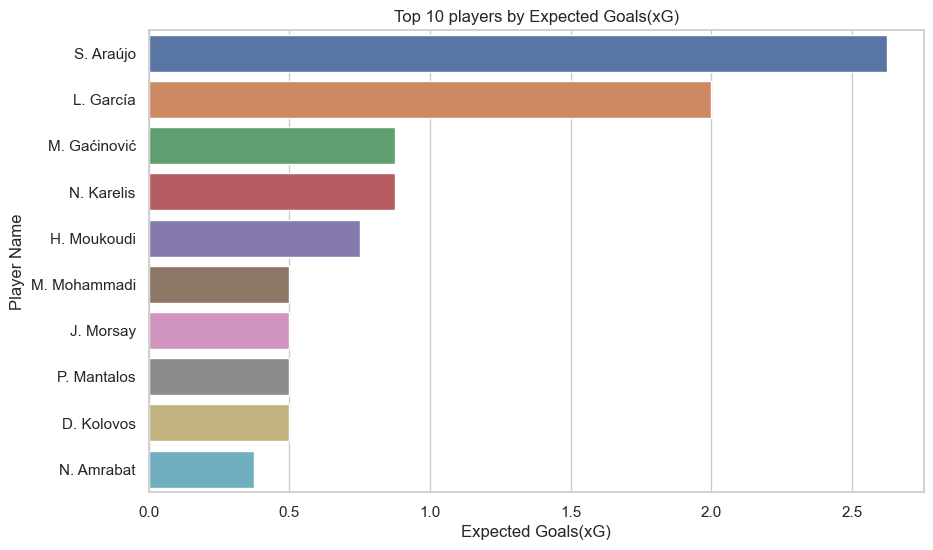

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
top_players=df.sort_values('xG',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='xG',y='matchName',data=top_players)
plt.title('Top 10 players by Expected Goals(xG)')
plt.xlabel('Expected Goals(xG)')
plt.ylabel('Player Name')
plt.show()